# Diamonds Data Exploration

## Preliminary Wrangling

This document explores a dataset containing Lyft bike rental records of first half year of 2019.

In [203]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [204]:
# load in the dataset into a pandas dataframe, print statistics
df_bike_1 = pd.read_csv('201901-fordgobike-tripdata.csv',)
df_bike_2 = pd.read_csv('201902-fordgobike-tripdata.csv')
df_bike_3 = pd.read_csv('201903-fordgobike-tripdata.csv')
df_bike_4 = pd.read_csv('201904-fordgobike-tripdata.csv')
df_bike_5 = pd.read_csv('201905-baywheels-tripdata.csv')
df_bike_6 = pd.read_csv('201906-baywheels-tripdata.csv')

df_bike = df_bike_1.append(df_bike_2,sort=False)\
            .append(df_bike_3,sort=False)\
            .append(df_bike_4,sort=False)\
            .append(df_bike_5,sort=False)\
            .append(df_bike_6,sort=False)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [210]:
# high-level overview of data shape and composition
print(df_bike.shape)
print(df_bike.dtypes)
print(df_bike.head(10))

(1176326, 17)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                   int64
member_gender                      object
bike_share_for_all_trip            object
rental_access_method               object
dtype: object
    duration_sec              start_time                end_time  \
0          80825 2019-01-31 17:57:44.613 2019-02-01 16:24:49.864   
1          65900 2019-01-31 20:58:33.886 2019-02-01 15:16:54.173   
2          62633 2019-01-31 18:06:52.924 2019-02-01 11

In the wrangling process, I listed some issues in these dataframes and fixed them.

### Quality
1. `start_time` and `end_time` should be datatime data type.
2. `start_station_id` and `end_station_id` should be int.
3. Missing values of `member_birth_year`.
4. `member_birth_year` should be int.
5. Missing values of `rental_access_method`.
6. `user_type` is a categorical dtype.
7. `gender` is a categorical dtype.
8. `bike_share_for_all_trip` is a categorical dtype.
9. Delete `SF Test Station` data points in the dataset.

### Tidiness
1. Seperate `start_time` and `end_time` into `month`, `hour` columns.

### Clean Data

### Define and Code
1. `start_time` and `end_time` should be datatime data type.

In [211]:
df_bike.start_time = pd.to_datetime(df_bike['start_time'])
df_bike.end_time = pd.to_datetime(df_bike['end_time'])


2. `start_station_id` and `end_station_id` should be int.

In [212]:

df_bike.start_station_id = df_bike.start_station_id.fillna(0)
df_bike.start_station_id = df_bike.start_station_id.astype('int64')
df_bike.end_station_id = df_bike.end_station_id.fillna(0)
df_bike.end_station_id = df_bike.end_station_id.astype('int64')

3. Missing values of `member_birth_year`.

In [213]:

p = df_bike.member_birth_year.isna().sum()/df_bike.member_birth_year.shape[0]
print('{0:.2f} % of member birth years are missing. We can delete these data for the analysis.'.format(p*100))
df_bike = df_bike[df_bike.member_birth_year.isna()==False]
df_bike.shape

0.00 % of member birth years are missing. We can delete these data for the analysis.


(1176326, 17)

4. `member_birth_year` should be int.

In [214]:
df_bike.member_birth_year = df_bike.member_birth_year.astype('int64')

5. Missing values of `rental_access_method`.

In [215]:
p = df_bike.rental_access_method.isna().sum()/df_bike.rental_access_method.shape[0]
print("{0:.2f} % of rental access method are missing. We don't use this feature for further analysis. I will delete this column.".format(p*100))
df_bike.drop(columns = ['rental_access_method'], inplace = True)


99.76 % of rental access method are missing. We don't use this feature for further analysis. I will delete this column.


6. `user_type` is a categorical dtype.
7. `gender` is a categorical dtype.
8. `bike_share_for_all_trip` is a categorical dtype.

In [216]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types
var_dict = {'user_type': ['Subscriber','Customer'],
                    'member_gender': ['Male', 'Female'],
                    'bike_share_for_all_trip': ['No','Yes']}

for var in var_dict:
    new_var = pd.api.types.CategoricalDtype(ordered = False,
                                                categories = var_dict[var])
    df_bike[var] = df_bike[var].astype(new_var)

9. Delete `SF Test Station` data point in the dataset.

In [217]:
df_bike = df_bike[(df_bike['start_station_name']!='SF Test Station')&(df_bike['end_station_name']!='SF Test Station')]

1. Seperate `start_time` and `end_time` into `month`, `hour` columns.

In [218]:
[df_bike['start_month'],df_bike['start_day'], df_bike['start_hr'],df_bike['day_of_week']] = \
        [df_bike.start_time.map(lambda x: x.strftime('%m')),\
          df_bike.start_time.map(lambda x: x.strftime('%d')), \
          df_bike.start_time.map(lambda x: x.strftime('%H')), \
          df_bike['start_time'].map(lambda x: x.strftime('%A'))]


In [219]:
[df_bike['end_month'],df_bike['end_day'], df_bike['end_hr']] = \
        [df_bike.end_time.map(lambda x: x.strftime('%m')),\
          df_bike.end_time.map(lambda x: x.strftime('%d')), \
          df_bike.end_time.map(lambda x: x.strftime('%H'))]

In [264]:
df_bike = df_bike[df_bike.member_birth_year>1919]

In [267]:
new_var = pd.api.types.CategoricalDtype(ordered = True,
                                            categories = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
df_bike['day_of_week'] = df_bike['day_of_week'].astype(new_var)

In [268]:
df_bike.day_of_week.dtype

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
                 ordered=True)

### Test

In [262]:
print(df_bike.shape)
print(df_bike.dtypes)
print(df_bike.head(10))

(1174937, 24)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                   int64
member_gender                    category
bike_share_for_all_trip          category
start_month                        object
start_day                          object
start_hr                           object
day_of_week                        object
end_month                          object
end_day                            object
end_hr                             object
location            

In [221]:
# descriptive statistics for numeric variables
print(df_bike[['duration_sec','member_birth_year']].describe())

       duration_sec  member_birth_year
count  1.176307e+06       1.176307e+06
mean   7.502938e+02       1.984696e+03
std    1.699836e+03       1.011579e+01
min    6.000000e+01       1.878000e+03
25%    3.410000e+02       1.980000e+03
50%    5.420000e+02       1.987000e+03
75%    8.430000e+02       1.992000e+03
max    8.611400e+04       2.001000e+03


### What is the structure of your dataset?

After cleaning the dataframe, there are 1176,326 bike rental records in the dataset with 16 features(duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). The features cover the location, duration, member age and gender information that are helpful for the analysis.

Some features are categorical data type:
1. user_type is either Customer or Membership
2. member_gender is either Male or Female
3. bike_share_for_all_trip is either Yes or No


### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the duration_sec in the dataset and which type of customers use Lyft bikes the most.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that user_type, member_gender and member_birth_year will have some relationship with rental frequency. duration_sec must be related to the distance between start station and end station.

## Univariate Exploration

I'll start by looking at the distribution of the main variable of interest: duration_sec.

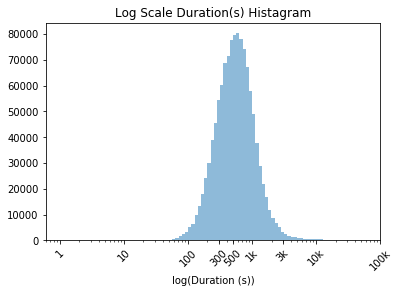

In [283]:
log_binsize = 0.05
bins = 10**np.arange(0,np.log10(df_bike['duration_sec'].max())+log_binsize, log_binsize);

plt.hist(data = df_bike, x = 'duration_sec', bins = bins, color=sb.color_palette()[0],alpha = 0.5);
plt.xscale('log')
plt.xticks([1, 10, 100, 300, 500, 1000, 3000, 10000, 100000],
           ['1', '10', '100', '300', '500', '1k', '3k', '10k','100k'],
          rotation = 45)
plt.xlabel('log(Duration (s))')
plt.title('Log Scale Duration(s) Histagram')
plt.show()


Since the renting duration is a long tail distribution and most renting durations are shorter, I used log-scale duration for visualization. Log scale duration is a normal distribution with the center around 500-1000 seconds, which is reasonable with my personal experience. People usually ride a bike for 5-10 mins for a commute distance that is slightly longer for walking and too short for driving.

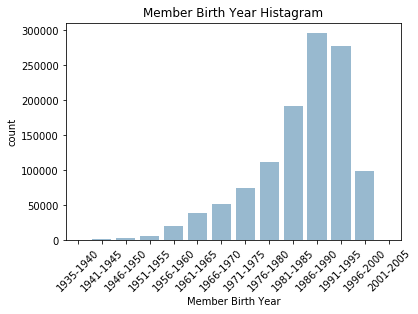

In [278]:
bins = np.arange(df_bike.member_birth_year.min(),df_bike.member_birth_year.max()+1,1);
sb.countplot(data = df_bike, x = 'age_group', color = sb.color_palette()[0],alpha = 0.5);
plt.xticks( rotation=45)
plt.xlabel('Member Birth Year')
plt.title('Member Birth Year Histagram')
plt.show()

The majority of customers are around 20 to 40 years old.People younger than 20 or above 40 don't use this sevice that much.

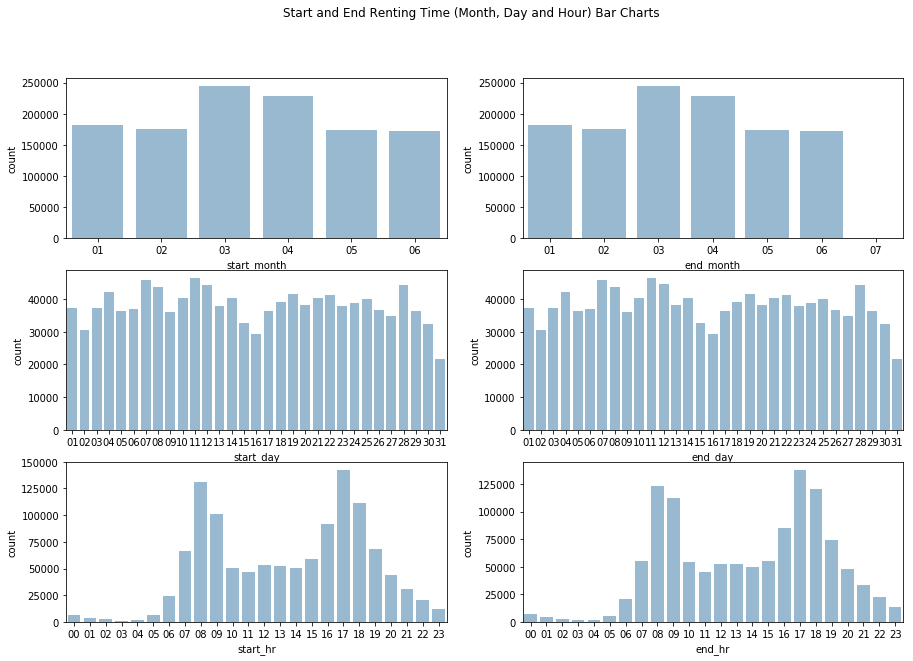

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize = [15,10])
fig.suptitle('Start and End Renting Time (Month, Day and Hour) Bar Charts')
default_color = sb.color_palette()[0]
sb.countplot(data = df_bike, x = 'start_month', color = default_color, ax = ax[0,0],alpha = 0.5)
sb.countplot(data = df_bike, x = 'start_day', color = default_color, ax = ax[1,0],alpha = 0.5)
sb.countplot(data = df_bike, x = 'start_hr', color = default_color, ax = ax[2,0],alpha = 0.5)
sb.countplot(data = df_bike, x = 'end_month', color = default_color, ax = ax[0,1],alpha = 0.5)
sb.countplot(data = df_bike, x = 'end_day', color = default_color, ax = ax[1,1],alpha = 0.5)
sb.countplot(data = df_bike, x = 'end_hr', color = default_color, ax = ax[2,1],alpha = 0.5)
plt.show()

March and April have more activate users than other months, no particular trend in date, and 7-9am and 5-6pm are definitely the pick hour for people to commute with bikes.

Text(0.5, 0, 'end_station_latitude')

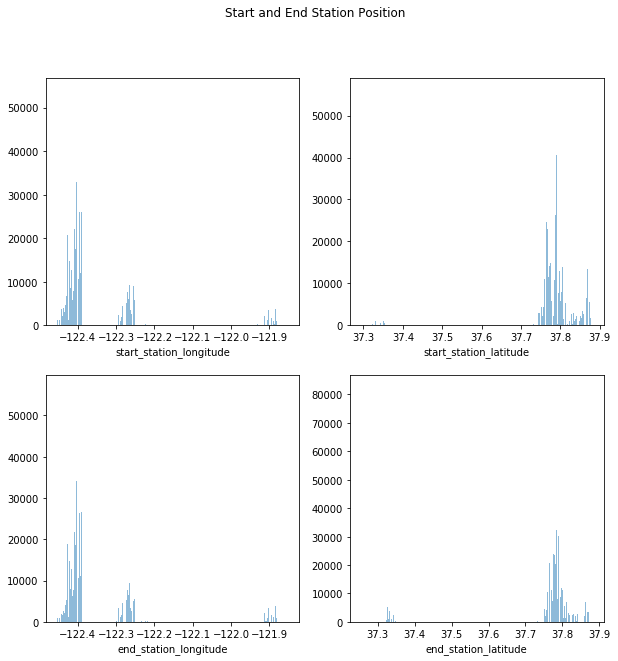

In [18]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.suptitle('Start and End Station Position')
plt.subplot(2,2,1)
plt.hist(data = df_bike, x = 'start_station_longitude', color = default_color, alpha = 0.5, bins = 1000)
plt.xlabel('start_station_longitude')
plt.subplot(2,2,2)
plt.hist(data = df_bike, x = 'start_station_latitude', color = default_color, alpha = 0.5, bins = 1000)
plt.xlabel('start_station_latitude')
plt.subplot(2,2,3)
plt.hist(data = df_bike, x = 'end_station_longitude', color = default_color, alpha = 0.5, bins = 1000)
plt.xlabel('end_station_longitude')
plt.subplot(2,2,4)
plt.hist(data = df_bike, x = 'end_station_latitude', color = default_color, alpha = 0.5, bins = 1000)
plt.xlabel('end_station_latitude')

Station longitude and latitude are both centralize to three peaks, which sugguested this service is more popular in some specific region but not nationalwise or globally. We will get more information about renting locations is bivariate plots.

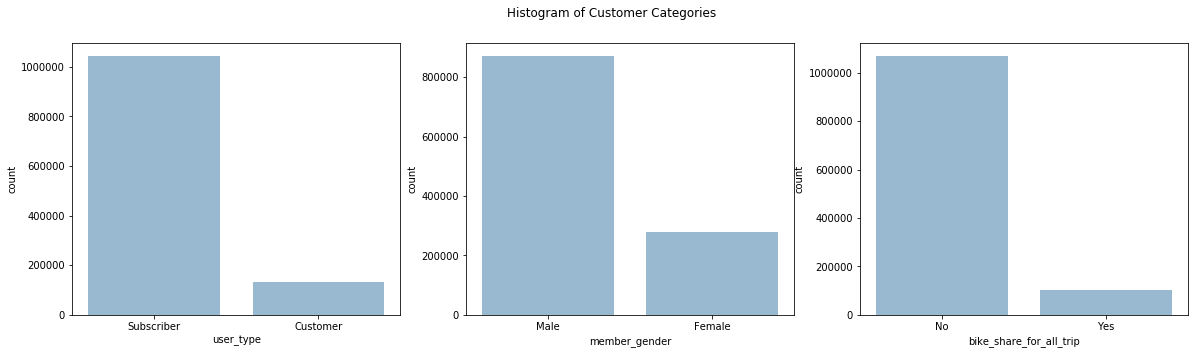

In [19]:
fig,ax = plt.subplots(ncols = 3, figsize=(20,5))
fig.suptitle('Histogram of Customer Categories')
sb.countplot(data = df_bike,x = 'user_type',ax = ax[0],color= default_color,alpha = 0.5)
sb.countplot(data = df_bike,x = 'member_gender',ax = ax[1],color= default_color, alpha = 0.5)
sb.countplot(data = df_bike,x = 'bike_share_for_all_trip',ax = ax[2],color= default_color, alpha = 0.5)


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked normal distributed, with one peak between 500 and 1000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When investigating the longitude and latitude variables, an outlier point were identified, start station longitude and latitude are both 0. I added the process of deleting this point to the cleaning process and found clear trend of longitude and latitude. The (0,0) is just a test data point with station name `SF Test Station`.

## Bivariate Exploration

To start off with, I want to look at the pairwise correlations present between features in the data.

In [20]:
numeric_vars = ['duration_sec', 'start_station_id', 'start_station_latitude', 'start_station_longitude',\
                'end_station_latitude', 'end_station_longitude','end_station_id','bike_id', 'member_birth_year',\
               'start_month','start_day','start_hr','end_month','end_day','end_hr']
categoric_vars = ['start_station_name', 'end_station_name', 'user_type','member_gender','bike_share_for_all_trip']

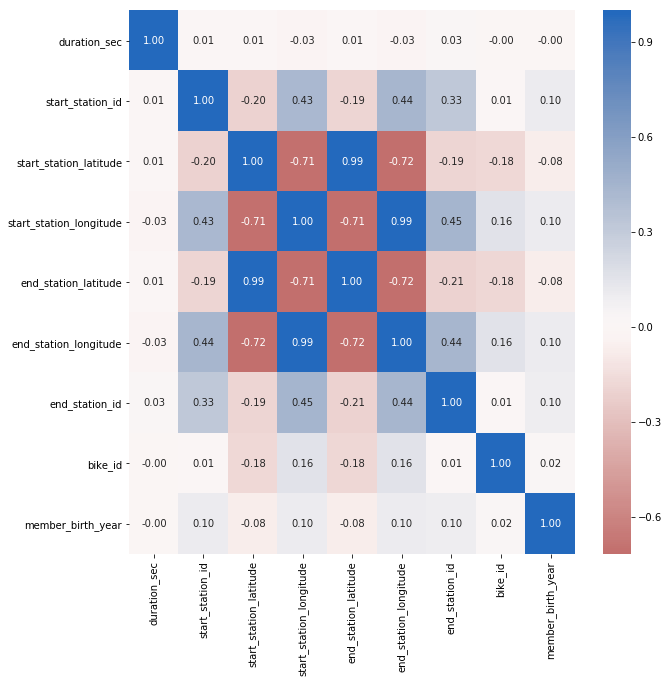

In [21]:
plt.figure(figsize = (10,10))
sb.heatmap(df_bike[numeric_vars].corr(), annot = True , fmt = '.2f',
          cmap = 'vlag_r', center = 0)

Text(0, 0.5, 'latitude')

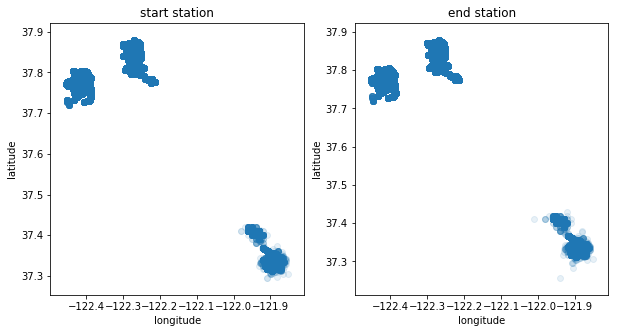

In [22]:
plt.subplots(ncols = 2, figsize = (10,5))
plt.subplot(1,2,1)
plt.scatter(data = df_bike,x = 'start_station_longitude',y = 'start_station_latitude',color = default_color,alpha = 0.1)
plt.title('start station')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.subplot(1,2,2)
plt.scatter(data = df_bike,x = 'end_station_longitude',y = 'end_station_latitude',color = default_color,alpha = 0.1)
plt.title('end station')
plt.xlabel('longitude')
plt.ylabel('latitude')

From the station usage distribution and finding the longitude and latitude in Google Map, I found the service is concentrated in San Francisco, Oakland and San Jose areas. 

Text(0, 0.5, 'delta(latitude)')

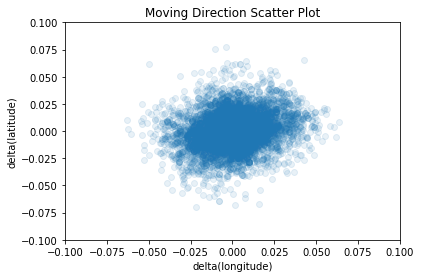

In [23]:
df_sub = df_bike.sample(10000)

plt.scatter(x = df_sub['end_station_longitude']-df_sub['start_station_longitude'],
            y =df_sub['end_station_latitude']-df_sub['start_station_latitude'] ,color = default_color,alpha = 0.1)
plt.title('Moving Direction Scatter Plot')
plt.xlabel('delta(longitude)')
plt.xlim([-0.1,0.1])
plt.ylim([-0.1,0.1])
plt.ylabel('delta(latitude)')

People move more in longitude direction compared to latitude direction.

<Figure size 2160x720 with 0 Axes>

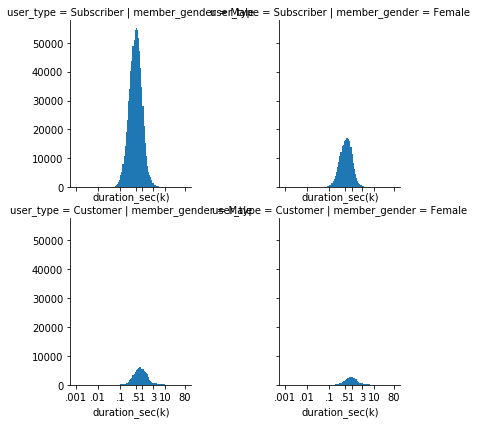

In [27]:
plt.figure(figsize = (30,10))
a = sb.FacetGrid(data = df_bike,col = 'member_gender', row = 'user_type')
bins = 10**np.arange(0,np.log10(df_bike['duration_sec'].max())+log_binsize, log_binsize);
a.map(plt.hist,'duration_sec', bins = bins).set(xscale = 'log')
ticks = [1, 10, 100, 500,1000, 3000, 10000,80000]
labels = ['.001','.01','.1', '.5','1','3','10','80']
a.set(xticks = ticks, xticklabels = labels, xlabel = 'duration_sec(k)')

The center lines of duration_sec of customers are around 1k seconds. However, the center lines of subscriber's duration are around 500 seconds. 

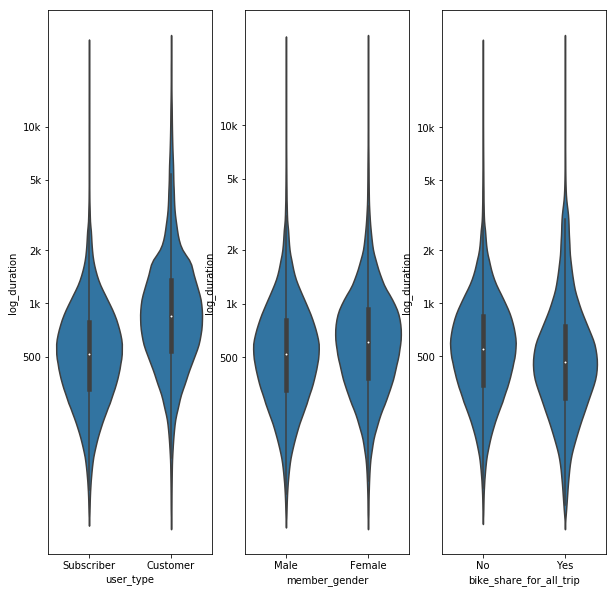

In [265]:
# plot the categorical variables against price and carat again, this time
# with full data and variable transforms

df_bike = df_bike[df_bike.duration_sec < 28800]
df_bike['log_duration'] = np.log10(df_bike.duration_sec)

fig, ax = plt.subplots(ncols = 3, nrows = 1 , figsize = [10,10])

for i in range(3):
    var = categoric_vars[i+2]
    sb.violinplot(data = df_bike, x = var, y = 'log_duration', ax = ax[i],
               color = default_color)
    ax[i].set_yticks(np.log10(np.array([500, 1e3, 2e3, 5e3, 1e4])))
    ax[i].set_yticklabels([500, '1k', '2k', '5k', '10k'])

plt.show()

#### When investigating renting duration for categotical variables, I will remove outliers who rent bikes for more than 10000 seconds. 
1. Subscribers tend to rent slightly shorter time than customers. The mean of subscriber renting time is 350 seconds and the mean of customer renting time is around 500 seconds.
2. There's no huge difference between male and female renting time. The mean of female renting time is slightly higher than male, but it's not significant.
3. No big difference between customers who bike share for all trip or not.

In [145]:
c = df_bike.groupby('start_day').duration_sec.mean()
c = pd.DataFrame(c)
pre_heat_c = pd.pivot_table(c, columns = 'start_day',values = 'duration_sec')
d = df_bike.groupby('start_day').duration_sec.count()
d = pd.DataFrame(d)
pre_heat_d = pd.pivot_table(d, columns = 'start_day',values = 'duration_sec')

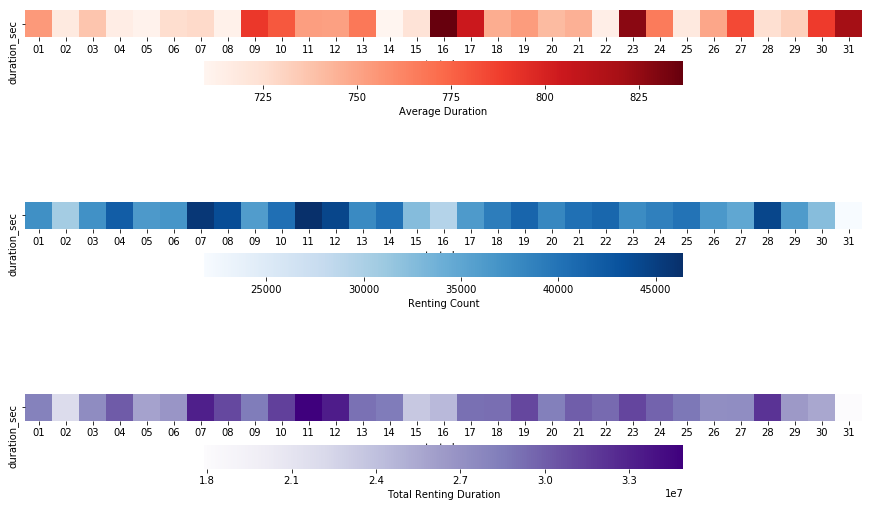

In [152]:

plt.figure(figsize = (15,10))
plt.subplot(3,1,1)
sb.heatmap(pre_heat_c, cmap = 'Reds',cbar_kws={'label':'Average Duration',"orientation": "horizontal"},square = True)
plt.subplot(3,1,2)
sb.heatmap(pre_heat_d, cmap = 'Blues', cbar_kws = {'label':'Renting Count',"orientation": "horizontal"},square = True)
plt.subplot(3,1,3)
sb.heatmap(np.transpose(c*d), cmap = 'Purples', cbar_kws={'label': 'Total Renting Duration','orientation':'horizontal'},square = True)

In [ ]:
e = df_bike.groupby('day_of_week').duration_sec.mean()
e = pd.DataFrame(e)
pre_heat_e = pd.pivot_table(e, columns = 'day_of_week',values = 'duration_sec')
pre_heat_e.sort_index(level=0, ascending=True, inplace=True)
f = df_bike.groupby('day_of_week').duration_sec.count()
f = pd.DataFrame(f)
pre_heat_f = pd.pivot_table(f, columns = 'day_of_week',values = 'duration_sec')
pre_heat_f.sort_index(level=0, ascending=True, inplace=True)

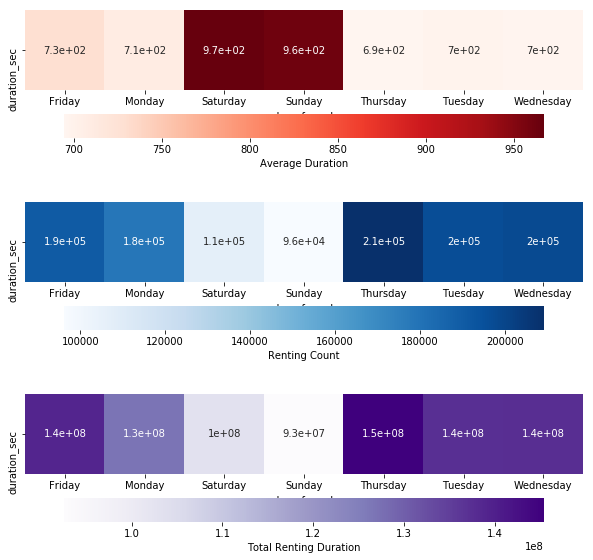

In [129]:
plt.figure(figsize = (10,10))
plt.subplot(3,1,1)
sb.heatmap(pre_heat_e, cmap = 'Reds',cbar_kws={'label':'Average Duration',"orientation": "horizontal"},square = True, annot=True)
plt.subplot(3,1,2)
sb.heatmap(pre_heat_f, cmap = 'Blues', cbar_kws = {'label':'Renting Count',"orientation": "horizontal"},square = True, annot=True)
plt.subplot(3,1,3)
sb.heatmap(np.transpose(e*f), cmap = 'Purples', cbar_kws={'label': 'Total Renting Duration','orientation':'horizontal'},square = True, annot=True)

No trends are found in average renting duration and count in start date. 
From the total renting duration chart, we found in the first half of a month, renting total time is longer than the second half.

There is a trend that the frequency of bike renting is higher in weekday, but the average renting duration is higher during weekends. This result meets our daily experience. During the weekday, people rent bikes for commute. Short distances and frequent renting. In the weekend, people rent bikes for visiting and traveling, which takes longer time. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


People rent bikes more frequently during the weekdays and relatively rarely rent bikes during weekends; people usually rent bikes for longer duration during weekends and shorter during weekdays. From the total renting time, we found in the first half of a month people rent bikes more compared to the second half. 

Customers average bike renting duration is longer than subscribers. I think there should be a relationship between user_type and renting week day. It makes sense for customers to rent bikes more frequently during weekends for visiting and subscribers rent bikes for commute during weekdays. I will do further investigation in multivariate plots.




### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

It's interesting that from latitude and longitude plot, I found the services are concentrated in three cities in bay area, San Francisco, Oakland and San Jose. We can seperate these three regions to do more comparison in multivariate plots. 

There's no trends found in the correlation coefficient chart. Though the coefficient for longitude and latitude is high, it's because even people ride bikes more miles, it only slightly changes the longitude and latitude of locations. The numbers are close enough to make it look like highly correlated features.


## Multivariate Exploration



In [68]:
a = pd.DataFrame(df_bike.groupby(['start_month','start_day'])['duration_sec'].mean())
pre_heat_df = pd.pivot_table(a,index='start_month',columns = 'start_day',values='duration_sec')

b = pd.DataFrame(df_bike.groupby(['start_month','start_day'])['duration_sec'].count())
pre_heat_df_2 = pd.pivot_table(b,index='start_month',columns = 'start_day',values='duration_sec')


Text(0.5, 1.0, 'Total Renting time for Each Day')

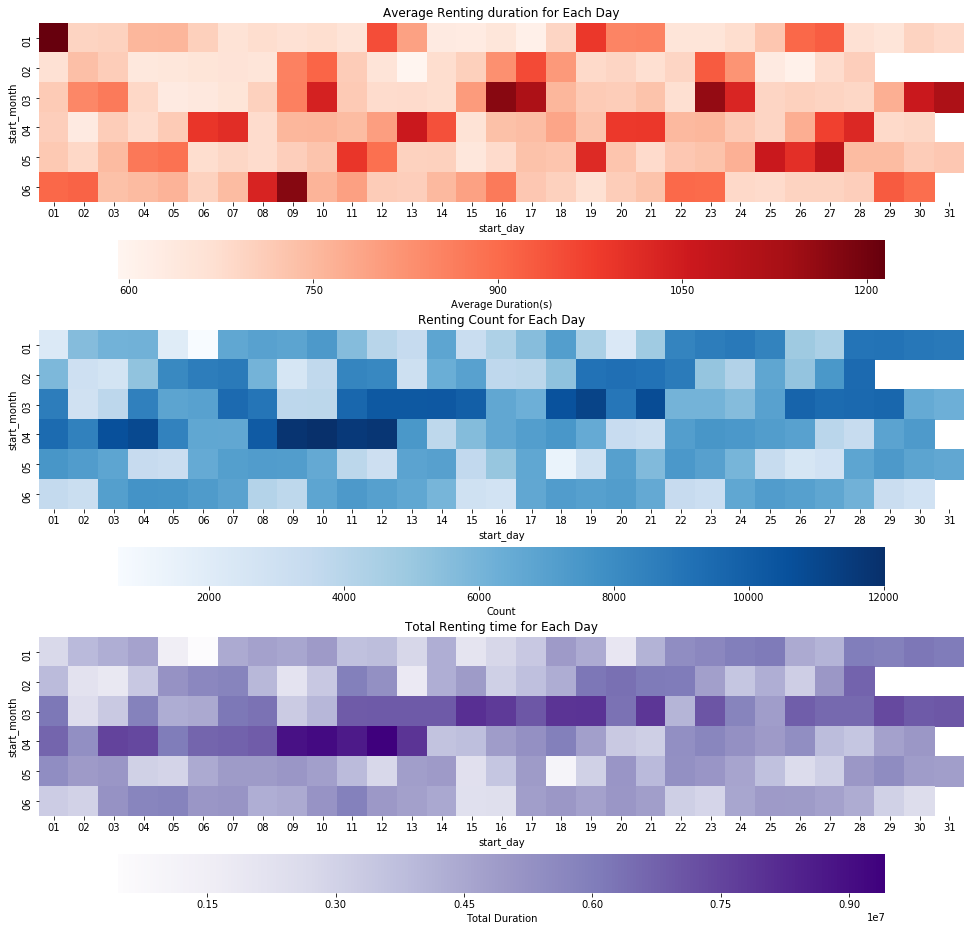

In [143]:
plt.figure(figsize= (24,16))
plt.subplot(3,1,1)
sb.heatmap(data = pre_heat_df, cmap = 'Reds',square = True,cbar_kws={'label': 'Average Duration(s)',
                                                                        'orientation':'horizontal' })
plt.title('Average Renting duration for Each Day')
plt.subplot(3,1,2)
sb.heatmap(data = pre_heat_df_2, cmap = 'Blues',square = True,cbar_kws={'label': 'Count',
                                                                        'orientation':'horizontal' })  
plt.title('Renting Count for Each Day')
plt.subplot(3,1,3)
sb.heatmap(data = pre_heat_df*pre_heat_df_2, cmap = 'Purples',square = True,cbar_kws={'label': 'Total Duration',
                                                                        'orientation':'horizontal' })  
plt.title('Total Renting time for Each Day')

It's a cool visualization of how many people rent bikes and how long is a trip in everyday. From the first renting duration chart, we can see periodical pattern that every seven day, there's a peak of renting duration, which is consistent with our previous result that people tend to rent bikes for longer time during weekends.
From the second plot, we found Lyft bike is more popular in March and April, but in May and June the renting time is much lower than before. This result can also be verified in the third plot that the total renting time is longer in March and April. The color for May and June rows are much lighter.

In [271]:
df_bike['location'] = pd.cut(df_bike.start_station_longitude,[-125,-122.35, -122.1,-120], labels = ['San Francisco','Oakland', 'San Jose'], include_lowest=True)
label = ['1935-1940','1941-1945','1946-1950','1951-1955','1956-1960','1961-1965','1966-1970','1971-1975','1976-1980',
        '1981-1985','1986-1990','1991-1995','1996-2000','2001-2005']
df_bike['age_group'] = pd.cut(df_bike.member_birth_year, np.arange(1935,2010,5), labels = label, include_lowest=True)

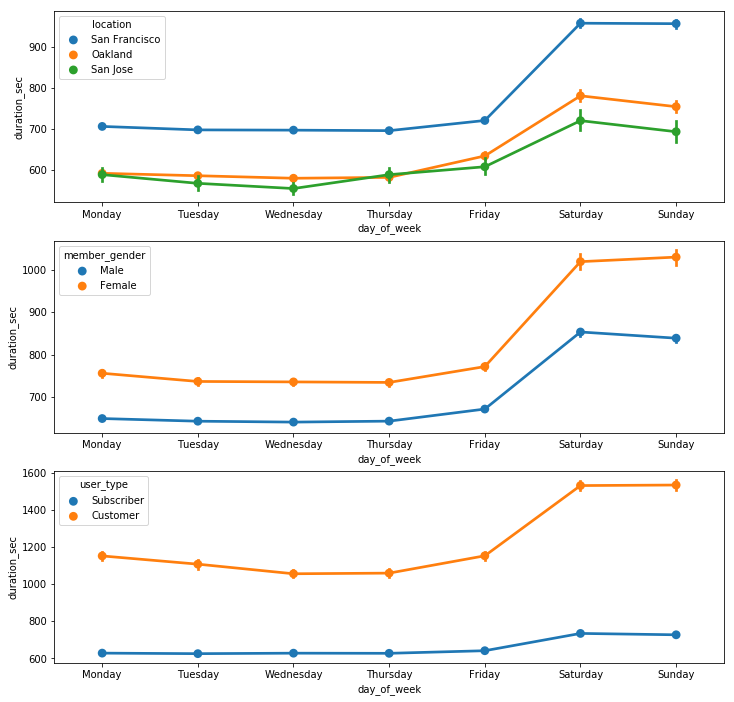

In [269]:
fig, ax = plt.subplots(ncols = 1, nrows = 3, figsize = [12,12])
sb.pointplot(data=df_bike, x = 'day_of_week',y= 'duration_sec', hue = 'location',ax = ax[0])
sb.pointplot(data=df_bike, x = 'day_of_week',y= 'duration_sec', hue = 'member_gender',ax = ax[1])
sb.pointplot(data=df_bike, x = 'day_of_week',y= 'duration_sec', hue = 'user_type', ax=ax[2])


Renting time is San Francisco is much longer than other areas. All location has the same renting duration peak during weekends. Female use Lyft bikes more frequent than male and customers rent bikes for longer time no matter which day of the week.

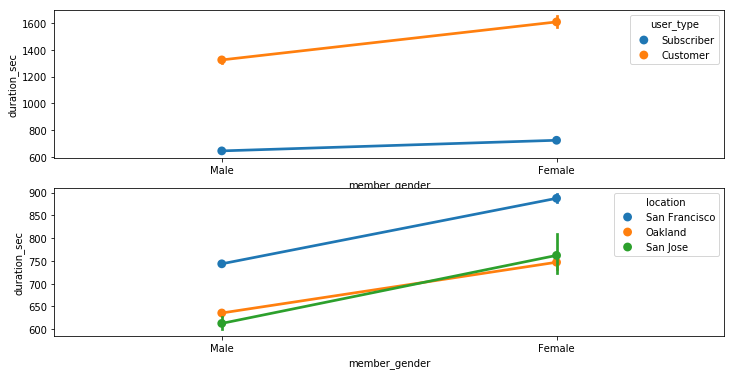

In [202]:
fig,ax = plt.subplots(nrows =2, ncols =1, figsize = [12,6])
sb.pointplot(data = df_bike, x = 'member_gender', y ='duration_sec',hue = 'user_type',ax = ax[0])
sb.pointplot(data = df_bike, x = 'member_gender', y ='duration_sec',hue = 'location',ax = ax[1])



These two plots meet our expectation and interstingly, we found females in San Jose rent bikes longer than female in Oakland, but males in Oakland rent bikes longer than male in San Jose. 

Text(0.5, 0.98, 'Sampled User Age, gender and Start Station Distribution in Three Cities ')

<Figure size 1800x720 with 0 Axes>

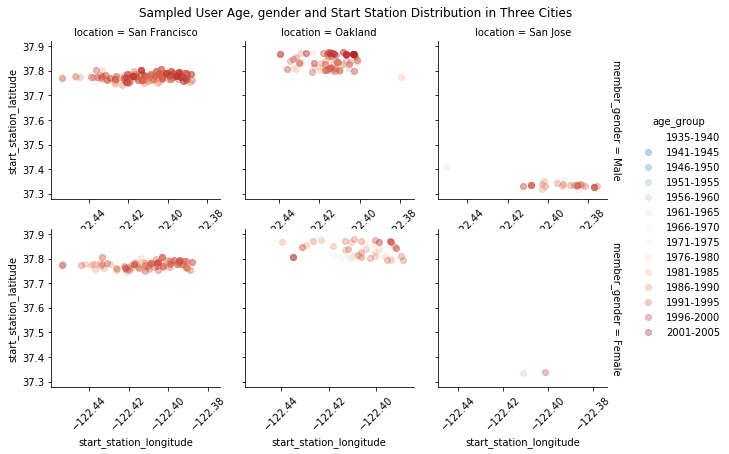

In [282]:
temp1 = df_bike.sample(1000)
plt.figure(figsize = (25,10))
g = sb.FacetGrid(data = temp1,col = 'location', row = 'member_gender',
                 hue = 'age_group',palette="RdBu_r",
                  margin_titles=True, sharex=False)
g.map(plt.scatter, 'start_station_longitude','start_station_latitude',alpha = 0.3).add_legend()
axes = plota.axes
g.set_xticklabels(rotation = 45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Sampled User Age, gender and Start Station Distribution in Three Cities ')




Overall, the quantity of females renting Lyft bikes is lower than male. Lyft bike is more frequently used in San Francisco than Oakland and the least popular area is San Jose. San Francisco active stations are the most concentrated (smaller longitude and latitude range). 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

All genders of users as customers rent bikes longer than subscribers. 
From the renting total time, we can see that Lyft bike is less popular in May and June compared to March and April. This is an warning sign for company to look into the data. 
Weekend renting duration is longer than weekday for all genders and user types. 

### Were there any interesting or surprising interactions between features?

The relative distances between stations are shorter in San Francisco than in other cities. Female users are less than male users in all cities and the most obvious can bee seen in San Jose. 